<p style="text-align:center; font-size:155%;color:red;"><strong>RESTAURANT RECOMMENDER SYSTEM</strong></p>



<p style="text-align:center; font-size:155%"><strong>UTHESH GANAPATHY E</strong></p>


## STEP 1 : EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING

In [1]:
# IMPORT THE NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium 
import requests
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [2]:
# LOAD THE DATASET

Data = pd.read_csv('C:/Users/raki4/Downloads/complete_dataset.csv')

In [3]:
# DATA HEAD

Data.head(10)

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892
5,5,Central,Pete area,12.962700,77.575800,730999,Bangalore,50712.430215
6,6,Central,Rajajinagar,12.990100,77.552500,981362,Bangalore,60967.535874
7,7,Central,Sadashivanagar,13.006800,77.581300,662625,Bangalore,59943.541564
8,8,Central,Seshadripuram,12.993500,77.578700,396862,Bangalore,58407.090338
9,9,Central,Shivajinagar,12.985700,77.605700,77836,Bangalore,55850.962099


In [4]:
# DROP THE 'UNNAMED' COLUMN

Data.drop('Unnamed: 0',axis=1,inplace=True)

### STORE THE BOROUGH, NEIGHBORHOODS, POPULATION IN SEPARATE DATASET

In [5]:
Bangalore = pd.DataFrame(Data[['Borough','Neighborhoods','Population']])
Bangalore.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [6]:
Data1 = pd.read_csv('population_dataset.csv')
Data1.head()

,Unnamed: 0,Borough,Neighborhoods,Population
0,0,Central,Cantonment area,866377
1,1,Central,Domlur,743186
2,2,Central,Indiranagar,474289
3,3,Central,Jeevanbheemanagar,527874
4,4,Central,Malleswaram,893629


### ADD 'AVERAGE INCOME' COLUMN TO OUR DATA

In [7]:
Bangalore.to_csv('population_dataset.csv')
Bangalore_Income = pd.DataFrame(Data[['Borough','Neighborhoods','AverageIncome']])
Bangalore_Income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


### LATITUDE AND LONGITUDE

In [8]:
Bangalore_Income.to_csv('income_dataset.csv')
Latitude = Data['Latitude'].mean()
Longitude = Data['Longitude'].mean()
print("LATITUDE/LONGITUDE OF BANGALORE ARE : ",Latitude,Longitude)

LATITUDE/LONGITUDE OF BANGALORE ARE :  12.962339620312497 77.60175294687502


In [9]:
CLIENT_ID = 'ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH'
CLIENT_SECRET = 'RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG'
VERSION = '20180606'
LIMIT = 150

###  FIND THE UNIQUE BOROUGH

In [10]:
Unique_Borough = Data['Borough'].unique().tolist()
Unique_Borough

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

## STEP 2 : EXPLORING BANGALORE NEIGHBORHOODS USING FOURSQUAREAPI

In [11]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("VENUES : ",name)  
        
        # CREATE API REQUEST
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # MAKE GET REQUEST
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # GET THE RELEVANT INFORMATION OF THE VENUES
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)


Bangalore_Venues = getNearbyVenues(names=Data['Neighborhoods'],latitudes=Data['Latitude'],longitudes=Data['Longitude'],boro=Data['Borough'])

VENUES :  Cantonment area
VENUES :  Domlur
VENUES :  Indiranagar
VENUES :  Jeevanbheemanagar
VENUES :  Malleswaram
VENUES :  Pete area
VENUES :  Rajajinagar
VENUES :  Sadashivanagar
VENUES :  Seshadripuram
VENUES :  Shivajinagar
VENUES :  Ulsoor
VENUES :  Vasanth Nagar
VENUES :  Bellandur
VENUES :  CV Raman Nagar
VENUES :  Hoodi
VENUES :  Krishnarajapuram
VENUES :  Mahadevapura
VENUES :  Marathahalli
VENUES :  Varthur
VENUES :  Whitefield
VENUES :  Banaswadi
VENUES :  HBR Layout
VENUES :  Horamavu
VENUES :  Kammanahalli
VENUES :  Lingarajapuram
VENUES :  Ramamurthy Nagar
VENUES :  Hebbal
VENUES :  Jalahalli
VENUES :  Mathikere
VENUES :  Peenya
VENUES :  R. T. Nagar
VENUES :  Vidyaranyapura
VENUES :  Yelahanka
VENUES :  Yeshwanthpur
VENUES :  Bommanahalli
VENUES :  Bommasandra
VENUES :  BTM Layout
VENUES :  Electronic City
VENUES :  HSR Layout
VENUES :  Koramangala
VENUES :  Madiwala
VENUES :  Banashankari
VENUES :  Basavanagudi
VENUES :  Girinagar
VENUES :  J. P. Nagar
VENUES :  Jayana

### TOTAL NUMBER OF VENUES 

In [12]:
print("TOTAL NUMBER OF VENUES LOCATED IN BANGALORE : ",Bangalore_Venues.shape[0])
Bangalore_Venues.head(5)

TOTAL NUMBER OF VENUES LOCATED IN BANGALORE :  580


,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
2,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
3,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant
4,Cantonment area,Central,12.972442,77.580643,S.J Lighting House,12.972337,77.576866,Furniture and Home Store


### DISPLAY THE RESTAURANT LOCATED IN PARTICULAR VENUE

In [13]:
Bangalore_Venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       110
Café                     30
Fast Food Restaurant     29
Department Store         22
Bakery                   21
Ice Cream Parlor         19
Pizzeria                 19
Chinese Restaurant       16
Coffee Shop              15
Restaurant               12
Name: Neighborhood, dtype: int64

### UNIQUE CATEGORIES

In [14]:
print("TOTAL NUMBER OF UNIQUE CATEGORY : ",len(Bangalore_Venues['Venue Category'].unique()))

TOTAL NUMBER OF UNIQUE CATEGORY :  123


### NUMBER OF VENUES PER NEIGHBORHOOD

In [15]:
Individual = Bangalore_Venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()
Individual.rename(columns={'Borough':'Number Of Venues'},inplace=True)
Individual.reset_index(inplace=True)
Individual

,Borough,Neighborhood,Number Of Venues
0,Central,Cantonment area,6
1,Central,Domlur,14
2,Central,Indiranagar,54
3,Central,Jeevanbheemanagar,5
4,Central,Malleswaram,7
...,...,...,...
57,Western,Nagarbhavi,7
58,Western,Nandini Layout,1
59,Western,Nayandahalli,5
60,Western,Rajarajeshwari Nagar,8


### INDRANAGAR HAS MORE NUMBER OF VENUES 

## VISUALIZATION

[Text(0, 0, 'Cantonment area'),
 Text(1, 0, 'Domlur'),
 Text(2, 0, 'Indiranagar'),
 Text(3, 0, 'Jeevanbheemanagar'),
 Text(4, 0, 'Malleswaram'),
 Text(5, 0, 'Pete area'),
 Text(6, 0, 'Rajajinagar'),
 Text(7, 0, 'Sadashivanagar'),
 Text(8, 0, 'Seshadripuram'),
 Text(9, 0, 'Shivajinagar'),
 Text(10, 0, 'Ulsoor'),
 Text(11, 0, 'Vasanth Nagar'),
 Text(12, 0, 'Bellandur'),
 Text(13, 0, 'CV Raman Nagar'),
 Text(14, 0, 'Hoodi'),
 Text(15, 0, 'Krishnarajapuram'),
 Text(16, 0, 'Mahadevapura'),
 Text(17, 0, 'Marathahalli'),
 Text(18, 0, 'Varthur'),
 Text(19, 0, 'Whitefield'),
 Text(20, 0, 'Banaswadi'),
 Text(21, 0, 'HBR Layout'),
 Text(22, 0, 'Horamavu'),
 Text(23, 0, 'Kammanahalli'),
 Text(24, 0, 'Lingarajapuram'),
 Text(25, 0, 'Ramamurthy Nagar'),
 Text(26, 0, 'Hebbal'),
 Text(27, 0, 'Jalahalli'),
 Text(28, 0, 'Mathikere'),
 Text(29, 0, 'Peenya'),
 Text(30, 0, 'R. T. Nagar'),
 Text(31, 0, 'Yelahanka'),
 Text(32, 0, 'Yeshwanthpur'),
 Text(33, 0, 'BTM Layout'),
 Text(34, 0, 'Bommanahalli'),
 Tex

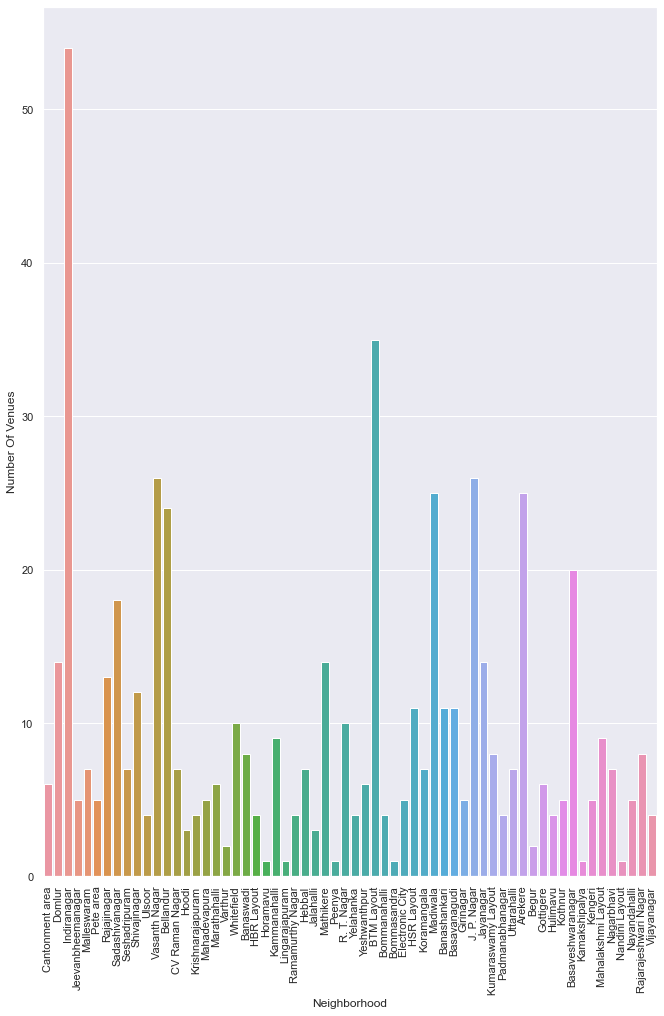

In [16]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='Number Of Venues',data=Individual)
plot.set_xticklabels(Individual['Neighborhood'],rotation=90)

## STEP 3 : LABEL ENCONDING TECHNIQUE


In [17]:
Onehot = pd.get_dummies(Bangalore_Venues[['Venue Category']])
Onehot

,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts and Crafts Store,Venue Category_Arts and Entertainment,Venue Category_Asian Restaurant,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bar,Venue Category_Bengali Restaurant,Venue Category_Bistro,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Travel Agency,Venue Category_Travel and Transportation,Venue Category_Udupi Restaurant,Venue Category_Vegan and Vegetarian Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### FIND THE TOP VENUES USING FREQUENCY

In [18]:
Onehot['Neighborhood'] = Bangalore_Venues['Neighborhood']
Grouped =Onehot.groupby('Neighborhood').mean().reset_index()
Top_Venues = 5

for hood in Grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = Grouped[Grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(Top_Venues))
    print('\n')

--------- Arekere ---------
                                  Venue  Frequency
0      Venue Category_Indian Restaurant       0.20
1  Venue Category_Sporting Goods Retail       0.16
2       Venue Category_Department Store       0.12
3               Venue Category_Pizzeria       0.08
4         Venue Category_Breakfast Spot       0.04


--------- BTM Layout ---------
                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.23
1  Venue Category_Fast Food Restaurant       0.09
2           Venue Category_Snack Place       0.09
3      Venue Category_Ice Cream Parlor       0.09
4    Venue Category_Chinese Restaurant       0.09


--------- Banashankari ---------
                                Venue  Frequency
0       Venue Category_Clothing Store       0.18
1                 Venue Category_Café       0.18
2  Venue Category_Fried Chicken Joint       0.09
3          Venue Category_Men's Store       0.09
4             Venue Category_Pizzeria       0.09


--

## STEP4 : MODEL BUILDING


## MODEL: <span style="color:red">K MEANS CLUSTERING</span>


In [19]:
def return_most_common_venues(row, Top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:Top_venues]

In [20]:
Top_venues = 10
indicators = ['st', 'nd', 'rd']

# CREATE COLUMNS ACCORDING TO TOP VENUES
columns = ['Neighborhood']
for ind in np.arange(Top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# CREATE NEW DATAFRAME
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Grouped['Neighborhood']

for ind in np.arange(Grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Grouped.iloc[ind, :], Top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Retail,Venue Category_Department Store,Venue Category_Pizzeria,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Fuel Station,Venue Category_Bus Line,Venue Category_Burrito Restaurant
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Snack Place,Venue Category_Ice Cream Parlor,Venue Category_Chinese Restaurant,Venue Category_Pizzeria,Venue Category_Vegan and Vegetarian Restaurant,Venue Category_Park,Venue Category_Sandwich Spot,Venue Category_Dim Sum Restaurant
2,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Fried Chicken Joint,Venue Category_Men's Store,Venue Category_Pizzeria,Venue Category_Indian Restaurant,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_North Indian Restaurant,Venue Category_Neighborhood
3,Banaswadi,Venue Category_Fuel Station,Venue Category_Juice Bar,Venue Category_Indian Restaurant,Venue Category_Vegan and Vegetarian Restaurant,Venue Category_Bakery,Venue Category_Grocery Store,Venue Category_Tea Room,Venue Category_Market,Venue Category_Office Supply Store,Venue Category_Music Venue
4,Basavanagudi,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Convenience Store,Venue Category_Metro Station,Venue Category_Travel Agency,Venue Category_Café,Venue Category_Hookah Bar,Venue Category_Office Supply Store,Venue Category_Neighborhood,Venue Category_Night Club


### FIND CLUSTER K VALUE USING ELBOW METHOD

C:\Users\raki4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


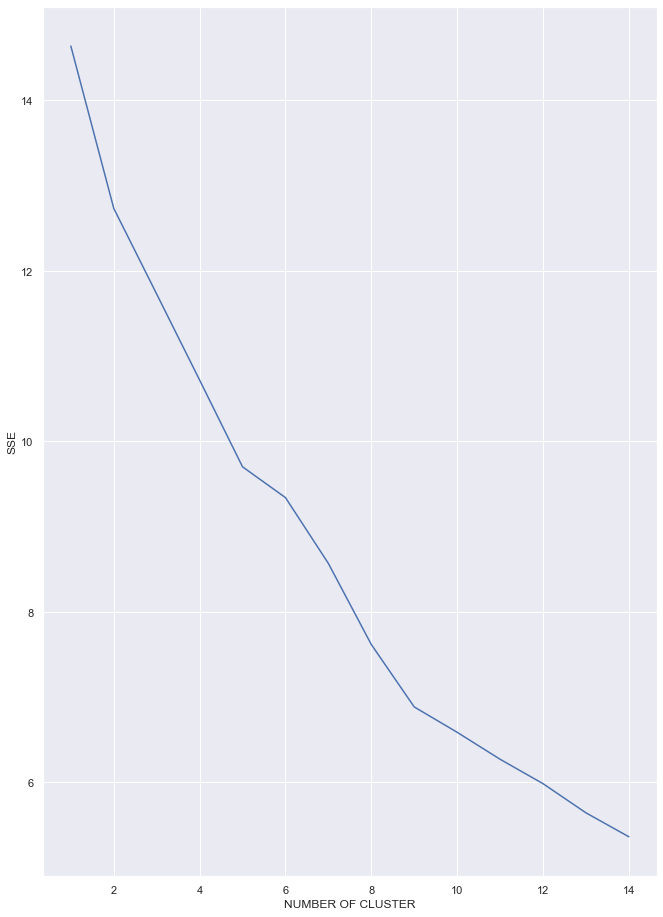

In [21]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(Grouped.drop('Neighborhood',axis=1))
    Grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("NUMBER OF CLUSTER")
plt.ylabel("SSE")
plt.show()

### OUR CLUSTER VALUE WOULD BE 5

In [22]:
# FIT THE MODEL

kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(Grouped.drop('Neighborhood',axis=1))

KMeans(n_clusters=5, random_state=0)

In [23]:
Grouped['Cluster'] = kmeans.labels_
Grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0     5
1    27
2     8
3     9
4    13
Name: Neighborhood, dtype: int64

In [24]:
Grouped.columns

Index(['Neighborhood', 'Venue Category_Andhra Restaurant',
       'Venue Category_Art Museum', 'Venue Category_Arts and Crafts Store',
       'Venue Category_Arts and Entertainment',
       'Venue Category_Asian Restaurant', 'Venue Category_BBQ Joint',
       'Venue Category_Bakery', 'Venue Category_Bar',
       'Venue Category_Bengali Restaurant',
       ...
       'Venue Category_Tex-Mex Restaurant', 'Venue Category_Toll Plaza',
       'Venue Category_Travel Agency',
       'Venue Category_Travel and Transportation',
       'Venue Category_Udupi Restaurant',
       'Venue Category_Vegan and Vegetarian Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Wine Bar',
       'Venue Category_Women's Store', 'Cluster'],
      dtype='object', length=125)

In [25]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(Grouped,on='Neighborhood')

In [26]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(Bangalore_Venues,on='Neighborhood')

## STEP5 : CREATE A MAP TO VISUALIZ THE CLUSTER 


In [27]:
# CREATE MAP
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11)

# SET COLORS FOR THE CLUSTER
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'],
                                  neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       

In [28]:
map_clusters

## STEP6 : FINDING RESTAURANT BASED ON USER INPUT

## <span style="color:red">RECOMMENDING VEGETERIAN RESTAURANT</span>


In [29]:
Veg = Onehot.groupby(['Neighborhood']).sum().reset_index()
Veg.head()

,Neighborhood,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts and Crafts Store,Venue Category_Arts and Entertainment,Venue Category_Asian Restaurant,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bar,Venue Category_Bengali Restaurant,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Travel Agency,Venue Category_Travel and Transportation,Venue Category_Udupi Restaurant,Venue Category_Vegan and Vegetarian Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store
0,Arekere,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,BTM Layout,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,0,0,0
2,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Banaswadi,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,Basavanagudi,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
Veg = Veg[['Neighborhood','Venue Category_Vegan and Vegetarian Restaurant']]
Veg.rename(columns={'Venue Category_Vegan and Vegetarian Restaurant':'Number Of Veg Restaurants'},inplace=True)
Veg.head()

,Neighborhood,Number Of Veg Restaurants
0,Arekere,0
1,BTM Layout,2
2,Banashankari,0
3,Banaswadi,1
4,Basavanagudi,0


## <span style="color:red">RECOMMENDING VEGETERIAN AND NON VEGETERIAN RESTAURANT</span>


In [31]:
Veg['Number Of NonVegan restaurants'] = 1-(Veg['Number Of Veg Restaurants']/Veg['Number Of Veg Restaurants'].max(axis=0))
Veg.head(15)

,Neighborhood,Number Of Veg Restaurants,Number Of NonVegan restaurants
0,Arekere,0,1.0
1,BTM Layout,2,0.0
2,Banashankari,0,1.0
3,Banaswadi,1,0.5
4,Basavanagudi,0,1.0
5,Basaveshwaranagar,0,1.0
6,Begur,0,1.0
7,Bellandur,0,1.0
8,Bommanahalli,0,1.0
9,Bommasandra,0,1.0


## <span style="color:red">RECOMMENDING ELECTRONIC CITY RESTAURANT</span>


In [32]:
Veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Electronic City']
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Wine Bar,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,168,Electronic City,Venue Category_Furniture and Home Store,Venue Category_Fuel Station,Venue Category_Outlet Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Pizzeria,Venue Category_Pharmacy,Venue Category_Performing Arts Venue,...,0.0,0.0,3,SouthEastern,12.840711,77.676369,e-Toll Gate,12.842121,77.675325,Toll Plaza
1,169,Electronic City,Venue Category_Furniture and Home Store,Venue Category_Fuel Station,Venue Category_Outlet Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Pizzeria,Venue Category_Pharmacy,Venue Category_Performing Arts Venue,...,0.0,0.0,3,SouthEastern,12.840711,77.676369,Global Living Emporio,12.841080,77.675598,Furniture and Home Store
2,170,Electronic City,Venue Category_Furniture and Home Store,Venue Category_Fuel Station,Venue Category_Outlet Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Pizzeria,Venue Category_Pharmacy,Venue Category_Performing Arts Venue,...,0.0,0.0,3,SouthEastern,12.840711,77.676369,Huskur Gate,12.839797,77.677198,Bus Stop
3,171,Electronic City,Venue Category_Furniture and Home Store,Venue Category_Fuel Station,Venue Category_Outlet Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Pizzeria,Venue Category_Pharmacy,Venue Category_Performing Arts Venue,...,0.0,0.0,3,SouthEastern,12.840711,77.676369,Indian Oil,12.838846,77.679569,Fuel Station
4,172,Electronic City,Venue Category_Furniture and Home Store,Venue Category_Fuel Station,Venue Category_Outlet Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Pizzeria,Venue Category_Pharmacy,Venue Category_Performing Arts Venue,...,0.0,0.0,3,SouthEastern,12.840711,77.676369,D-mart electronics city,12.843154,77.674111,Outlet Store


## <span style="color:red">RECOMMENDING BELLANDUR RESTAURANT</span>


In [33]:
Veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Bellandur']
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Wine Bar,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,112,Bellandur,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Fast Food Restaurant,Venue Category_Japanese Restaurant,Venue Category_Mexican Restaurant,Venue Category_Punjabi Restaurant,Venue Category_Pizzeria,Venue Category_Kerala Restaurant,...,0.0,0.0,1,Eastern,12.926,77.6762,Happy Endings,12.924386,77.672970,Dessert Shop
1,113,Bellandur,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Fast Food Restaurant,Venue Category_Japanese Restaurant,Venue Category_Mexican Restaurant,Venue Category_Punjabi Restaurant,Venue Category_Pizzeria,Venue Category_Kerala Restaurant,...,0.0,0.0,1,Eastern,12.926,77.6762,Domino's Pizza,12.926045,77.676107,Pizzeria
2,114,Bellandur,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Fast Food Restaurant,Venue Category_Japanese Restaurant,Venue Category_Mexican Restaurant,Venue Category_Punjabi Restaurant,Venue Category_Pizzeria,Venue Category_Kerala Restaurant,...,0.0,0.0,1,Eastern,12.926,77.6762,Cafe Coffee Day Central 3,12.926107,77.675755,Café
3,115,Bellandur,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Fast Food Restaurant,Venue Category_Japanese Restaurant,Venue Category_Mexican Restaurant,Venue Category_Punjabi Restaurant,Venue Category_Pizzeria,Venue Category_Kerala Restaurant,...,0.0,0.0,1,Eastern,12.926,77.6762,McDonald's,12.927228,77.675688,Fast Food Restaurant
4,116,Bellandur,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Fast Food Restaurant,Venue Category_Japanese Restaurant,Venue Category_Mexican Restaurant,Venue Category_Punjabi Restaurant,Venue Category_Pizzeria,Venue Category_Kerala Restaurant,...,0.0,0.0,1,Eastern,12.926,77.6762,McDonald's,12.925893,77.675356,Fast Food Restaurant
5,117,Bellandur,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Fast Food Restaurant,Venue Category_Japanese Restaurant,Venue Category_Mexican Restaurant,Venue Category_Punjabi Restaurant,Venue Category_Pizzeria,Venue Category_Kerala Restaurant,...,0.0,0.0,1,Eastern,12.926,77.6762,Bangalore Central,12.926006,77.675301,Shopping Mall
6,118,Bellandur,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Fast Food Restaurant,Venue Category_Japanese Restaurant,Venue Category_Mexican Restaurant,Venue Category_Punjabi Restaurant,Venue Category_Pizzeria,Venue Category_Kerala Restaurant,...,0.0,0.0,1,Eastern,12.926,77.6762,Thalassery Restaurant,12.925845,77.675901,Kerala Restaurant
7,119,Bellandur,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Fast Food Restaurant,Venue Category_Japanese Restaurant,Venue Category_Mexican Restaurant,Venue Category_Punjabi Restaurant,Venue Category_Pizzeria,Venue Category_Kerala Restaurant,...,0.0,0.0,1,Eastern,12.926,77.6762,PVR,12.926328,77.675347,Movie Theater
8,120,Bellandur,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Fast Food Restaurant,Venue Category_Japanese Restaurant,Venue Category_Mexican Restaurant,Venue Category_Punjabi Restaurant,Venue Category_Pizzeria,Venue Category_Kerala Restaurant,...,0.0,0.0,1,Eastern,12.926,77.6762,Aangan,12.925265,77.674112,Indian Restaurant
9,121,Bellandur,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Fast Food Restaurant,Venue Category_Japanese Restaurant,Venue Category_Mexican Restaurant,Venue Category_Punjabi Restaurant,Venue Category_Pizzeria,Venue Category_Kerala Restaurant,...,0.0,0.0,1,Eastern,12.926,77.6762,Mast Kalandar,12.925604,77.675966,Indian Restaurant
